# Sampling using `sim_tools` 

To reduce the amount of coding you have to do to implement sampling from distributions you can use the [`sim-tools` package](https://pypi.org/project/sim-tools/).  You can read the `sim-tools` documentation [here](https://tommonks.github.io/sim-tools). 

The `sim-tools` package aims provide python implementations of all the common distributions seen in commercial discrete-event simulation software in easy to use classes.  This includes several distributions not directly implemented in `numpy`. 

## Installation

The `sim-tools` package is included in the `sim` conda virtual environment.  To install manually you can use the following command:

```
pip install sim-tools
```

> The code below uses `sim-tools` >= 0.3.2. This works with Python >= 3.10

## Summary of implemented distributions

1. `Exponential`: This class is used for modeling the time between events in a Poisson process, where events occur continuously and independently at a constant average rate. It takes the mean of the distribution and an optional random seed as parameters.

2. `Bernoulli`: This class models a process where an event has only two possible outcomes (success or failure). It takes the probability of success and an optional random seed as parameters.

3. `Lognormal`: This class is used when the logarithm of a variable is normally distributed. It takes the mean and standard deviation of the lognormal distribution and an optional random seed as parameters.

4. `Normal`: This class models a process where a variable is normally distributed. It takes the mean and standard deviation of the normal distribution, a boolean to allow or disallow negative samples, and an optional random seed as parameters.

5. `Uniform`: This class models a process where all outcomes are equally likely. It takes the lower and upper range of the uniform distribution and an optional random seed as parameters.

6. `Triangular`: This class models a process where a variable is most likely to be at the mode (peak) and the probabilities decrease uniformly on either side. It takes the lower limit, mode, upper limit, and an optional random seed as parameters.

7. `FixedDistribution`: This class returns a fixed value, useful when a constant value is needed in a simulation. It takes a fixed value as a parameter.

8. `CombinationDistribution`: This class is used to model a process where the outcome is the sum of outcomes from multiple distributions. It takes multiple distribution instances as parameters.

9. `ContinuousEmpirical`: This class is used to model a process based on observed data, where the probability of an outcome is proportional to its frequency in the data. To produce a continuous value, linear interpolation between bounds is used. It takes lower bounds (of a discrete empirical distribution), upper bounds, observed frequencies, and an optional random seed as parameters.

10. `Erlang`: This class is used for modeling the time between events in a Poisson process, where events occur continuously and independently at a constant average rate. The class is implemented to allow for users to input the mean, and stdev of the distribution as opposed to k and theta. This allows for compatibility of parameters with other commerical simulation packages. The mean and stdev are converted to k and theta internally. The Erlang is a special case of the gamma distribution where  is an integer.  Internally this is implemented using numpy Generator's gamma method. As k is calculated from the mean and stdev it is rounded to an integer value using python's built in 'round' function. Optionally a user can offet the original of the distribution using the location parameter.

11. `ErlangK`: The same as **Erlang**, but `k` and `theta` are specified directly by a user. 

12. The `Weibull` distribution class is characterized by a shape parameter (alpha) and a scale parameter (beta), both of which must be greater than zero. The scale parameter influences the variance of the samples. An optional location parameter can shift the distribution to set a lower bound. This distribution is useful for modeling the life duration of materials and systems, where the failure rate is not constant over time[1].

13. The `Gamma` distribution class is defined by an alpha (scale) and beta (shape) parameter. It includes methods to compute the mean and variance, as well as a static method to determine alpha and beta from a specified mean and variance. The Gamma distribution is often used to model waiting times for multiple events in a Poisson process.

14. The `Beta` distribution class accepts two shape parameters (alpha1 and alpha2) and can be rescaled to a specific range using lower and upper bounds. It is commonly used to model random variables that are constrained to an interval, such as proportions and percentages.

15. `Discrete` distribution class allows sampling from a set of values with given observed frequencies. It is particularly useful for modeling scenarios where outcomes have specific probabilities, such as routing percentages or entity classes.

16. `TruncatedDistribution` class can truncate any given distribution at a specified lower bound. It is useful when modeling variables that have a natural lower limit, ensuring that no sampled values fall below this threshold.

17. The `RawEmpirical` distribution class enables sampling with replacement from a list of raw empirical values. This class is beneficial when no theoretical distribution fits the observed data well, and a non-parametric approach is preferred.

18. The `PearsonV` (Pearson type 5) distribution, also known as the inverse Gamma distribution, is characterized by two parameters: alpha (shape) and beta (scale), both of which must be greater than zero. It is particularly useful for modeling time delays where there is a minimum delay and the maximum delay is unbounded. The mean and variance of the Pearson Type V distribution can be directly computed for certain values of the shape parameter.

19. The `PearsonVI` (Pearson Type 6) distribution, an inverted beta distribution, is defined by three parameters: alpha1 (shape parameter 1), alpha2 (shape parameter 2), and beta (scale parameter), all of which must be greater than zero. The Pearson Type VI distribution can be used to model the time to complete tasks and is sampled using the transformation Pearson6(a1, a2, b) = b * X / (1 - X), where X is a Beta-distributed random variable with parameters alpha1 and alpha2. The mean and variance can be computed directly for certain values of the second shape parameter.

## Importing distribution classes

The `sim_tools.distributions` module contains all of the distribution classes. 

In [1]:
# import all distributions
from sim_tools.distributions import (
    Exponential,
    Poisson,
    Bernoulli,
    Lognormal,
    Normal,
    Uniform,
    Triangular,
    FixedDistribution,
    CombinationDistribution,
    ContinuousEmpirical,
    Erlang,
    ErlangK,
    Weibull,
    Gamma,
    Beta,
    Discrete,
    PearsonV,
    PearsonVI,
)

## Create and visualise the distributions

The code below creates an instance of the distributions on offer. Here we have used the `size` parameter in `sample()` to produce a large number of samples to allow for visualisation and plotting.

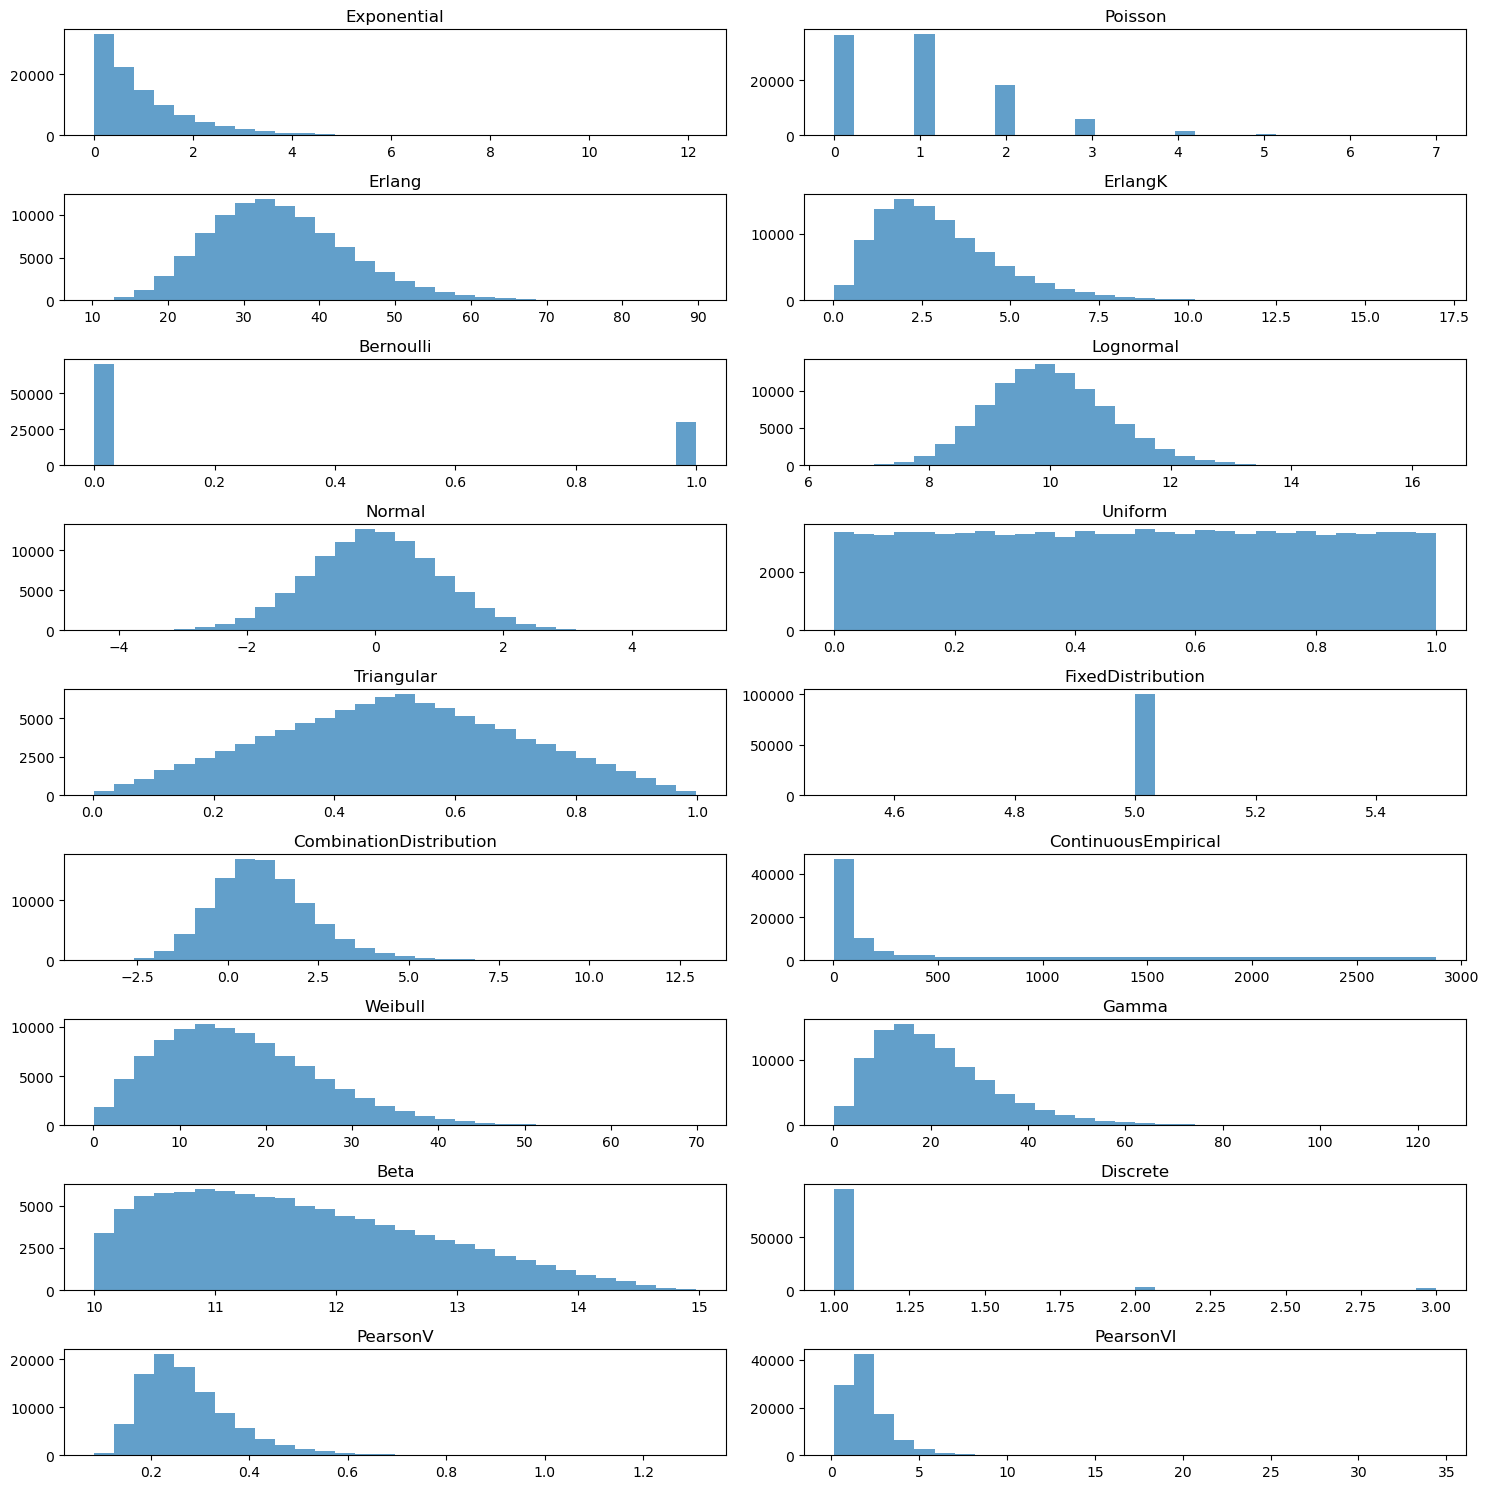

In [2]:
import matplotlib.pyplot as plt

# Create an instance of each distribution and generate 10,000 samples
distributions = [
    Exponential(mean=1.0, random_seed=42),
    Poisson(rate=1.0, random_seed=42),
    Erlang(mean=32.0, stdev=9.26, location=2.83, random_seed=42),
    ErlangK(k=3, theta=1.0, location=0.0, random_seed=42),
    Bernoulli(p=0.3, random_seed=42),
    Lognormal(mean=10, stdev=1, random_seed=42),
    Normal(mean=0, sigma=1, allow_neg=True, random_seed=42),
    Uniform(low=0, high=1, random_seed=42),
    Triangular(low=0, mode=0.5, high=1, random_seed=42),
    FixedDistribution(value=5),
    CombinationDistribution(
        Exponential(mean=1.0), Normal(mean=0, sigma=1, allow_neg=True)
    ),
    ContinuousEmpirical(
        lower_bounds=[0, 5, 10, 15, 30, 45, 60, 120, 180, 240, 480],
        upper_bounds=[5, 10, 15, 30, 45, 60, 120, 180, 240, 480, 2880],
        freq=[34, 4, 8, 13, 15, 13, 19, 13, 9, 12, 73],
        random_seed=42,
    ),
    Weibull(alpha=1.93, beta=19.15, random_seed=42),
    Gamma(alpha=2.84, beta=7.42, location=0.0, random_seed=42),
    Beta(alpha1=1.32, alpha2=2.56, lower_bound=10.0, upper_bound=15.0, random_seed=42),
    Discrete(values=[1, 2, 3], freq=[95, 3, 2], random_seed=42),
    PearsonV(alpha=10.0, beta=2.5, random_seed=42),
    PearsonVI(alpha1=10.0, alpha2=5.0, beta=0.85, random_seed=42),
]

fig, axs = plt.subplots(len(distributions) // 2, 2, figsize=(15, 15))

for i, distribution in enumerate(distributions):
    row = i // 2
    col = i % 2
    samples = distribution.sample(size=100_000)
    axs[row, col].hist(samples, bins=30, alpha=0.7)
    axs[row, col].set_title(distribution.__class__.__name__)

fig.tight_layout()
plt.show()

## Generating individual samples

In a discrete-event simulation you are more likely to generate samples as time progresses.  The code below illustrates how to generate single samples from the `Exponential` and `ContinuousEmpirical` distributions.

In [3]:
arrival_dist = Exponential(mean=30, random_seed=42)
arrival_dist.sample()

72.12625811897983

In [4]:
activity_time = ContinuousEmpirical(
    lower_bounds=[0, 5, 10, 15, 30, 45, 60, 120, 180, 240, 480],
    upper_bounds=[5, 10, 15, 30, 45, 60, 120, 180, 240, 480, 2880],
    freq=[34, 4, 8, 13, 15, 13, 19, 13, 9, 12, 73],
    random_seed=42,
)

activity_time.sample()

1297.0730413946362